# Classify Iris species using logistic regression

## Table of contents

* [Introduction](#Introduction)
* [Data_wrangling](#Data_wrangling)
* [Exploratory_Data_analysis](#Exploratory_Data_analysis)
* [Model_building](#Model_building)
* [Conclusions](#Conclusions)

## Introduction

### About Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [8]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#load data

df=pd.read_csv('Iris.csv')

## Data_wrangling

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data frame has 150 rows with 6 columns with no null values in any of the columns and its data types vary from float,int,objects

In [38]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [40]:
#checking for duplicates

df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


There are no duplicated rows in the dataset

In [20]:
#checking statisticalinsights

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It seems that there are no columns with zero values that would need ammendment

 checking for outiers in numerical columns

In [133]:
# this is a function that takes a column name and calculates its IQR and min outlier and max outlier

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [31]:
outlier_treatment(df['SepalLengthCm'])

(3.1499999999999986, 8.350000000000001)

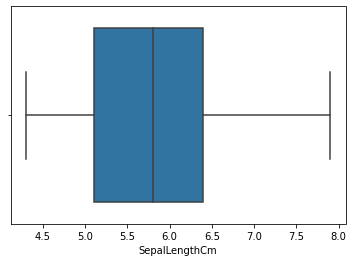

In [23]:
sns.boxplot(df['SepalLengthCm']);

In [32]:
outlier_treatment(df['SepalWidthCm'])

(2.05, 4.05)

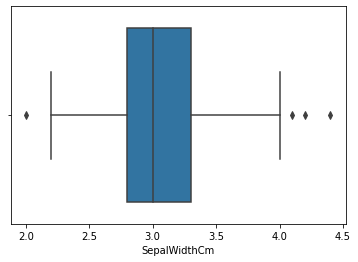

In [24]:
sns.boxplot(df['SepalWidthCm']);

In [33]:
outlier_treatment(df['PetalLengthCm'])

(-3.649999999999999, 10.349999999999998)

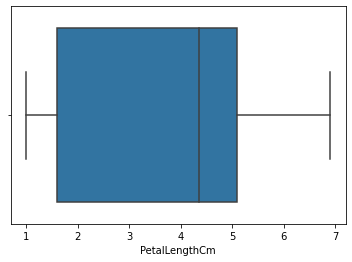

In [28]:
sns.boxplot(df['PetalLengthCm']);

In [34]:
outlier_treatment(df['PetalWidthCm'])

(-1.95, 4.05)

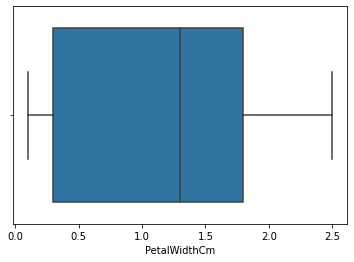

In [29]:
sns.boxplot(df['PetalWidthCm']);

It seems that as per the box plot , the only column worth of ammending is 'SepalWidthCm' column

In [37]:
# droppng the outliers from sepalwidth cm column

df=df[(df['SepalWidthCm']>2.3) & (df['SepalWidthCm']<=4)]

## Exploratory_Data_analysis

In [51]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,76.625899,5.867626,3.076259,3.808633,1.224460
std,44.193296,0.841859,0.362676,1.783194,0.774208
min,1.000000,4.300000,2.400000,1.000000,0.100000
25%,38.500000,5.100000,2.800000,1.600000,0.300000
50%,78.000000,5.800000,3.000000,4.400000,1.400000
75%,114.500000,6.450000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.000000,6.900000,2.500000


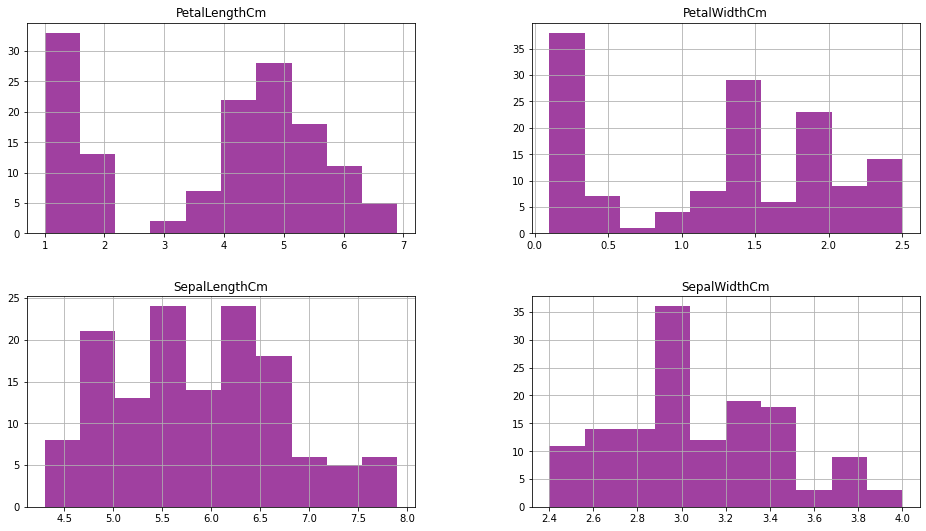

In [50]:
df.hist(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],figsize=(16,24),layout=(5,2),color='purple',alpha=0.75);

Observations:
1. petalenght varies mostly from 1 to 1.7 and it varies moderately from 4 to 5 cm
2. petalwidth varies mostly from 0.10 to 0.4 nad it varis moderatley from 1.3 to 1.5 cm
3. sepallenght varies mostly between 5.3 and 5.8 and 6.1 to 6.4 and fluctuates moderatley around the remaining values
4. sepalwidth is concentrated mostly between 2.9 and 3 cm and fluctuates moderatley around the remaining values

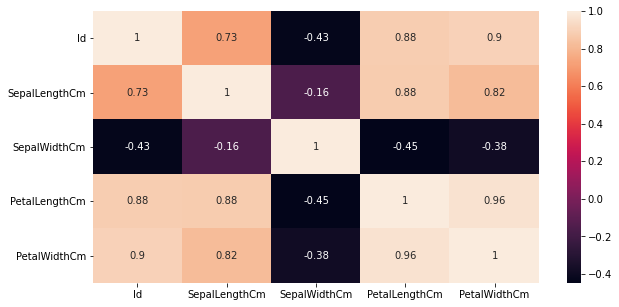

In [54]:
#create a heatmap to find correlaton between column
plt.figure(figsize=(10,5));
sns.heatmap(df.corr(),annot=True);

Observations:

1. Sepallenght and petlallenght has strong correlation(0.88)
2. petallenght and petalwidth has strong correlation(0.96)
3. petallenght and sepallenght has strong correlation(0.82)


In [55]:
# checking categorical columns in the dataset
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Species']

In [56]:
#checking for duplicated values in the categorical columns befor including them into our model
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Species
Iris-virginica     49
Iris-setosa        46
Iris-versicolor    44
Name: Species, dtype: int64



All the categorical values in the column are unique and not repeated in any ther forms

transforming the categorical data i am going to use in my model into numercial column with discrete values (0,1,2)

In [132]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])

## Model_building

In [121]:
# Preparing test data

df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [122]:
# deciding our model features

x=df.drop(['Id','Species'],axis=1)
x.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [123]:
y=df['Species']
y.head(1)

0    0
Name: Species, dtype: int32

In [124]:
# splitting the data into train and test data

from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lg=LogisticRegression()

In [128]:
lg.fit(X_train,y_train)

C:\Users\Aellawah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
predictions=lg.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 2])

In [130]:
# Evaluate your model through classification report

from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



Classification report shows that the f1-score of the model is 97% which is a very good result, precision which represents the percentage of the positive predictive value is 100% in Iris-setsa , 100% in Iris-versicolor, 98% Iris-virginica species, recall
which represents the percentage of relevant data found by the model in the dataset is 100% in Iris-setsa , 93% in Iris-versicolor, 100% Iris-virginica species

## Conclusions

* Data frame has 150 rows with 6 columns with no null values in any of the columns and its data types vary from float,int,objects
* Data had no null values nor duplicated rows
* There was some outliers in 'SepalWidthCm' column which we removed them to enhance our project
* No duplicated data in the categorical column
* Sepallenght and petlallenght columns has strong correlation(0.88)
* petallenght and petalwidth columns has strong correlation(0.96)
* petallenght and sepallenght columns has strong correlation(0.82)
* Classification report showed that the f1 score of the model is 97% which is a very good result